In [1]:
import pandas as pd



In [3]:
df = pd.read_excel('한국복지패널조사_2022년_17차_가구용,가구원용,복지인식설문용_결합.xlsx')
df.head()

,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_cobf,p17_wsc,p17_wsl,p17_wgc,...,wc17_64,wc17_65,wc17_5aq4,wc17_5aq5,wc17_5aq6,h17_pers_income1,h17_pers_income2,h17_pers_income3,h17_pers_income4,h17_pers_income5
0,2,1,1,20101,0,0,NaN,0.255099,0.255098,1301.779156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,3,1,1,30101,0,0,NaN,0.369345,0.369345,1884.782338,...,NaN,NaN,NaN,NaN,NaN,NaN,2064.0,NaN,0,NaN
2,4,1,1,40101,0,0,NaN,0.228046,0.228400,1163.730163,...,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,0,NaN
3,6,1,1,60101,0,0,NaN,0.524368,0.534658,2675.871234,...,1.0,.,1.0,3.0,4.0,3216.0,NaN,NaN,0,NaN
4,6,1,1,60101,0,0,NaN,0.851223,0.851223,4343.829280,...,4.0,.,1.0,4.0,3.0,NaN,1680.0,NaN,0,NaN


In [13]:

## 전체에서 뺼거 뺴는거 부터 ㄱㄱ 
data = df.copy()

In [14]:
train = data.loc[:,['p1705_9','p1705_10','p1705_11','p1705_12','p1705_13','p1705_14',                           ## 종속변수 설문
'p1705_15','p1705_16','p1705_17','p1705_18','p1705_19','h17_g3','h17_g4','h17_g6','h17_g7','h17_g11'            
,'p1705_3aq3','p1705_3aq5','p1705_3aq6'
,'p1705_2','p1705_3','p1705_4aq1','p1705_4aq7','p1705_4aq8'
,'p1705_3aq11'
,'h17_hc_n_all'
,'h1705_3','h17_med2'
,'h17_g8',
'h17_eco9']]
train.head()

,p1705_9,p1705_10,p1705_11,p1705_12,p1705_13,p1705_14,p1705_15,p1705_16,p1705_17,p1705_18,...,p1705_3,p1705_4aq1,p1705_4aq7,p1705_4aq8,p1705_3aq11,h17_hc_n_all,h1705_3,h17_med2,h17_g8,h17_eco9
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,2,NaN,4,0,NaN
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,5,0,942.0
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,2,0,762.0
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,2,0,855.0
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,1,NaN,2,0,399.0


In [20]:
train.columns = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11'
,'gen','age','rel','edu','edu_rate'
,'sm_total','sm_state','sm_mean'
,'dr_mean_year','dr_cup','dr_six','dr_hurt','dr_worry'
,"preg"
,"income_bal"
,"heal_satis",'heal_state'
,"disabled"
,"work_code"]
train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,dr_cup,dr_six,dr_hurt,dr_worry,preg,income_bal,heal_satis,heal_state,disabled,work_code
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,2,NaN,4,0,NaN
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,5,0,942.0
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,2,0,762.0
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,2,0,855.0
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,1,NaN,2,0,399.0


In [22]:
train.to_excel("한국복지패널찐막데이터.xlsx")

In [90]:
new_df = train.copy()
new_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,dr_cup,dr_six,dr_hurt,dr_worry,preg,income_bal,heal_satis,heal_state,disabled,work_code
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,2,NaN,4,0,NaN
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,5,0,942.0
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,2,0,762.0
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,2,0,855.0
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,1,NaN,2,0,399.0


In [91]:
new_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,dr_cup,dr_six,dr_hurt,dr_worry,preg,income_bal,heal_satis,heal_state,disabled,work_code
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,2,NaN,4,0,NaN
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,5,0,942.0
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,2,0,762.0
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1,NaN,2,0,855.0
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2.0,1,NaN,2,0,399.0


In [92]:
## 우울감 정도 점수 만들기 
### Q1~Q11 까지 점수 더하면 됌

# new_df[new_df["Q1"].apply(lambda x : x in [1,2,3,4])]

# new_df['Q1'] = new_df['Q1'].apply(lambda x : x in [1,2,3,4])


new_df= new_df.loc[new_df['Q1']!=9,:]
new_df['Q1'].value_c

AttributeError: 'Series' object has no attribute 'value_c'

In [93]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15913 entries, 0 to 16590
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            13474 non-null  float64
 1   Q2            13474 non-null  float64
 2   Q3            13474 non-null  float64
 3   Q4            13474 non-null  float64
 4   Q5            13474 non-null  float64
 5   Q6            13474 non-null  float64
 6   Q7            13474 non-null  float64
 7   Q8            13474 non-null  float64
 8   Q9            13474 non-null  float64
 9   Q10           13474 non-null  float64
 10  Q11           13474 non-null  float64
 11  gen           15913 non-null  int64  
 12  age           15913 non-null  int64  
 13  rel           15913 non-null  int64  
 14  edu           15913 non-null  int64  
 15  edu_rate      15913 non-null  int64  
 16  sm_total      1119 non-null   float64
 17  sm_state      13474 non-null  float64
 18  sm_mean       2036 non-null   f

In [94]:
##  모름 제거 완료
qdata = new_df.iloc[:,:11]
qdata['total'] = qdata.loc[:,:].sum(axis=1)
qdata.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,total
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,20.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,29.0
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,18.0
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,20.0
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,21.0


In [95]:
new_df['y_total'] = qdata['total']
new_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,dr_six,dr_hurt,dr_worry,preg,income_bal,heal_satis,heal_state,disabled,work_code,y_total
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,2.0,2,NaN,4,0,NaN,20.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,NaN,NaN,NaN,0.0,1,NaN,5,0,942.0,29.0
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,0.0,1,NaN,2,0,762.0,18.0
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,0.0,1,NaN,2,0,855.0,20.0
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,2.0,1,NaN,2,0,399.0,21.0


In [96]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15913 entries, 0 to 16590
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            13474 non-null  float64
 1   Q2            13474 non-null  float64
 2   Q3            13474 non-null  float64
 3   Q4            13474 non-null  float64
 4   Q5            13474 non-null  float64
 5   Q6            13474 non-null  float64
 6   Q7            13474 non-null  float64
 7   Q8            13474 non-null  float64
 8   Q9            13474 non-null  float64
 9   Q10           13474 non-null  float64
 10  Q11           13474 non-null  float64
 11  gen           15913 non-null  int64  
 12  age           15913 non-null  int64  
 13  rel           15913 non-null  int64  
 14  edu           15913 non-null  int64  
 15  edu_rate      15913 non-null  int64  
 16  sm_total      1119 non-null   float64
 17  sm_state      13474 non-null  float64
 18  sm_mean       2036 non-null   f

In [97]:
## 건강만족도에 대한 칼럼은 삭제 --> 데이터가 너무 적어서
new_df = new_df.drop(['heal_satis'],axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15913 entries, 0 to 16590
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            13474 non-null  float64
 1   Q2            13474 non-null  float64
 2   Q3            13474 non-null  float64
 3   Q4            13474 non-null  float64
 4   Q5            13474 non-null  float64
 5   Q6            13474 non-null  float64
 6   Q7            13474 non-null  float64
 7   Q8            13474 non-null  float64
 8   Q9            13474 non-null  float64
 9   Q10           13474 non-null  float64
 10  Q11           13474 non-null  float64
 11  gen           15913 non-null  int64  
 12  age           15913 non-null  int64  
 13  rel           15913 non-null  int64  
 14  edu           15913 non-null  int64  
 15  edu_rate      15913 non-null  int64  
 16  sm_total      1119 non-null   float64
 17  sm_state      13474 non-null  float64
 18  sm_mean       2036 non-null   f

<Axes: >

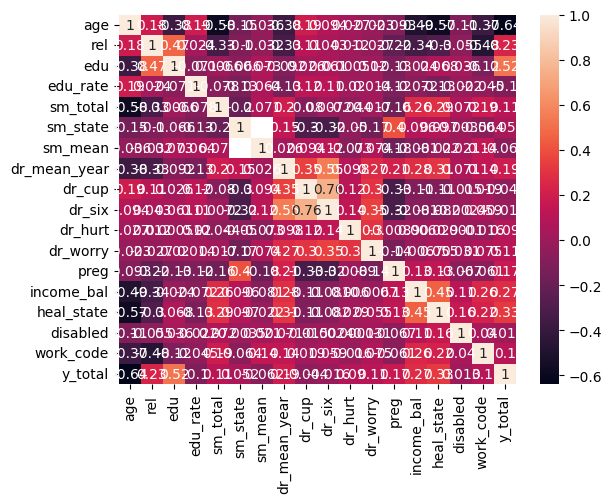

In [117]:
import matplotlib as plt
import seaborn as sns

sns.heatmap(new_df.iloc[:,12:].corr(),annot=True,cbar=True)